In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import gzip
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import random
import tensorflow as tf
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dropout
from keras.layers import Dense, Activation
from tensorflow.keras.layers import BatchNormalization
from keras import initializers
from keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math
import torch
import pickle

In [ ]:
def accuracy(pred, test):
  length = len(pred)
  num = 0
  for i in range(length):
    if pred[i]==test[i]:
      num += 1
  return num/(length*1.0)

In [ ]:
def classWiseAccuracy(y_t,y_p):
  pred = []
  test = []
  for i in range(10):
    pred.append([])
    test.append([])

  for i in range(len(y_p)):
    cls = y_t[i]
    pred[cls].append(y_t[i])
    test[cls].append(y_p[i])

  for i in range(10):
    print('Class'+str(i), end = ' ')
    print(accuracy_score(test[i],pred[i]))

In [ ]:
def images_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images
def labels_file_read(file_name):
    with gzip.open(file_name, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

#Question 1

In [ ]:
X_train = images_file_read("/content/drive/MyDrive/SML/mnist/train-images-idx3-ubyte.gz")
print(X_train.shape)
y_train = labels_file_read("/content/drive/MyDrive/SML/mnist/train-labels-idx1-ubyte.gz")
X_test = images_file_read("/content/drive/MyDrive/SML/mnist/t10k-images-idx3-ubyte.gz")
print(X_test.shape)
y_test = labels_file_read("/content/drive/MyDrive/SML/mnist/t10k-labels-idx1-ubyte.gz")
# y_test = list(y_test)

X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
iterations = 5
learning_rate = 0.1
trees = []

In [ ]:
# F0 = y_train.mean()
# Fm = F0
# trees = []
# for _ in range(5):
#     tree = DecisionTreeRegressor()
#     tree.fit(X_train, y_train - Fm)
#     Fm += learning_rate * tree.predict(X_train)
#     trees.append(tree)
# final_prediction = F0 + learning_rate * np.sum([t.predict(X_train) for t in trees], axis=0)
# print(final_prediction)
# for i in range(len(final_prediction)):
#   final_prediction[i] = round(final_prediction[i])
# print(accuracy(list(final_prediction), list(y_train)))

In [ ]:
# base_model = DecisionTreeRegressor(max_depth = 1)
# base_model = base_model.fit(X_train, y_train)
# prediction = base_model.predict(X_train)
# trees.append(base_model)

In [ ]:
prediction = 0

In [ ]:
for i in range(iterations):
  residue = y_train-(learning_rate*prediction)
  print(residue)
  model = DecisionTreeRegressor(max_depth=1)
  model = model.fit(X_train, residue)
  prediction = model.predict(X_train)
  trees.append(model)

[5. 0. 4. ... 5. 6. 8.]
[ 4.46328627 -0.26254691  3.46328627 ...  4.46328627  5.46328627
  7.46328627]
[ 4.51695764 -0.23629222  3.51695764 ...  4.51695764  5.51695764
  7.51695764]
[ 4.5115905  -0.23891769  3.5115905  ...  4.5115905   5.5115905
  7.5115905 ]
[ 4.51212722 -0.23865514  3.51212722 ...  4.51212722  5.51212722
  7.51212722]


In [ ]:
# y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

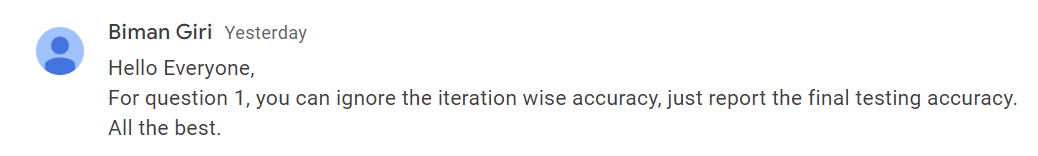

In [ ]:
final_prediction = learning_rate * np.sum([t.predict(X_train) for t in trees], axis=0)
for i in range(len(final_prediction)):
  final_prediction[i] = round(final_prediction[i])
print('Training accuracy:', accuracy(list(final_prediction), list(y_train)))

Training accuracy: 0.17033333333333334


In [ ]:
test = learning_rate*np.sum([t.predict(X_test) for t in trees], axis=0)
# print(test)
for i in range(len(test)):
  test[i] = round(test[i])
print('Testing accuracy:', accuracy(list(test), list(y_test)))

Testing accuracy: 0.1706


In [ ]:
for i in range(len(trees)):
  name = 'Q1_tree'
  name += str(i+1)
  with open(name, 'wb') as file:
    pickle.dump(name, file)

#Question 2

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/SML/fminst/fashion-mnist_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/SML/fminst/fashion-mnist_test.csv")

In [ ]:
X_train = df_train.loc[ : , df_train.columns != 'label']
y_train = pd.DataFrame(df_train['label'])

X_test = df_test.loc[ : , df_test.columns != 'label']
y_test = pd.DataFrame(df_test['label'])

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
model = Sequential()

model.add(Dense(512, input_dim=784, trainable=True,activation='sigmoid', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))

model.add(Dense(128, input_dim=512, trainable=True,activation='sigmoid', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))

model.add(Dense(64, input_dim=128, trainable=True,activation='sigmoid', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))

model.add(Dense(32, input_dim=128, trainable=True,activation='sigmoid', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))

model.add(Dense(10, input_dim=32, trainable=True,activation='softmax', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(
  optimizer=sgd,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 478,250
Trainable params: 478,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, to_categorical(y_train), batch_size=700, epochs=28) #batch sie = 700

Epoch 1/28
86/86 [==============================] - 4s 35ms/step - loss: 2.3263 - accuracy: 0.1939
Epoch 2/28
86/86 [==============================] - 3s 34ms/step - loss: 2.1611 - accuracy: 0.4146
Epoch 3/28
86/86 [==============================] - 3s 34ms/step - loss: 1.9093 - accuracy: 0.4500
Epoch 4/28
86/86 [==============================] - 3s 34ms/step - loss: 1.6802 - accuracy: 0.4828
Epoch 5/28
86/86 [==============================] - 3s 34ms/step - loss: 1.5197 - accuracy: 0.5229
Epoch 6/28
86/86 [==============================] - 3s 35ms/step - loss: 1.3559 - accuracy: 0.5473
Epoch 7/28
86/86 [==============================] - 3s 34ms/step - loss: 1.2138 - accuracy: 0.6000
Epoch 8/28
86/86 [==============================] - 3s 35ms/step - loss: 1.1021 - accuracy: 0.6305
Epoch 9/28
86/86 [==============================] - 5s 57ms/step - loss: 1.0143 - accuracy: 0.6517
Epoch 10/28
86/86 [==============================] - 5s 62ms/step - loss: 0.9440 - accuracy: 0.6702
Epoch 11/


The hyperparameters assumed other than those mentioned in the question are: trainable=True, use_bias=True, activation=`sigmoid` for all the layers other than the output layer where activation=`softmax`

Batch size=700, number of epochs=28 and learning rate=0.01


In [ ]:
model.save('Q2.h5')

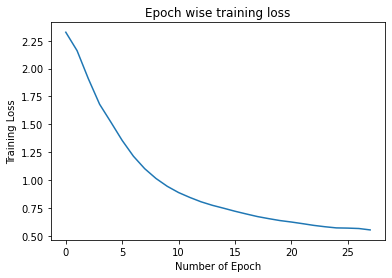

In [ ]:
x_axis = []
y_axis = []

for i in range(len(history.history['loss'])):
  x_axis.append(i)
  y_axis.append(history.history['loss'][i])

plt.plot(x_axis, y_axis)
plt.title('Epoch wise training loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_pred = list(y_pred)
y_test = y_test.reshape(10000,)
y_test = list(y_test)

In [ ]:
print('Accuracy: ', accuracy(y_pred, y_test))

Accuracy:  0.8203


In [ ]:
classWiseAccuracy(y_test,y_pred)

Class0 0.809
Class1 0.939
Class2 0.734
Class3 0.848
Class4 0.63
Class5 0.878
Class6 0.582
Class7 0.871
Class8 0.946
Class9 0.966


#Question 3

In [ ]:
X_train = images_file_read("/content/drive/MyDrive/SML/mnist/train-images-idx3-ubyte.gz")
# X_train = (X_train/255)-0.5
print(X_train.shape)
y_train = labels_file_read("/content/drive/MyDrive/SML/mnist/train-labels-idx1-ubyte.gz")
X_test = images_file_read("/content/drive/MyDrive/SML/mnist/t10k-images-idx3-ubyte.gz")
# X_test = (X_test/255)-0.5
print(X_test.shape)
y_test = labels_file_read("/content/drive/MyDrive/SML/mnist/t10k-labels-idx1-ubyte.gz")

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

In [ ]:
model = Sequential()

model.add(Dense(512, input_dim=784, activation='relu', trainable=True, use_bias=True)) #trainable=true #use_bias=true

model.add(Dense(128, input_dim=512, activation='relu', trainable=True, use_bias=True))

model.add(Dense(64, input_dim=128, activation='relu', trainable=True, use_bias=True))

model.add(Dense(128, input_dim=64, activation='relu', trainable=True, use_bias=True))

model.add(Dense(512, input_dim=128, activation='relu', trainable=True, use_bias=True))

model.add(Dense(784, input_dim=512, activation='relu', trainable=True, use_bias=True))

adam = tf.keras.optimizers.Adam(learning_rate=0.001) #learning_rate=0.001

model.compile(
  optimizer=adam,
  loss='mean_squared_error',
  metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 512)               66048     
                                                                 
 dense_10 (Dense)            (None, 784)               402192    
                                                                 
Total params: 952,400
Trainable params: 952,400
Non-tr

In [ ]:
history = model.fit(X_train, X_train, batch_size=512, epochs=30)

Epoch 1/30
118/118 [==============================] - 8s 60ms/step - loss: 2595.3726 - accuracy: 0.0110
Epoch 2/30
118/118 [==============================] - 7s 60ms/step - loss: 1337.7465 - accuracy: 0.0122
Epoch 3/30
118/118 [==============================] - 7s 60ms/step - loss: 1143.5463 - accuracy: 0.0129
Epoch 4/30
118/118 [==============================] - 7s 60ms/step - loss: 1051.9165 - accuracy: 0.0128
Epoch 5/30
118/118 [==============================] - 7s 59ms/step - loss: 996.5377 - accuracy: 0.0136
Epoch 6/30
118/118 [==============================] - 7s 59ms/step - loss: 954.5947 - accuracy: 0.0137
Epoch 7/30
118/118 [==============================] - 7s 60ms/step - loss: 922.2701 - accuracy: 0.0135
Epoch 8/30
118/118 [==============================] - 8s 67ms/step - loss: 899.1624 - accuracy: 0.0145
Epoch 9/30
118/118 [==============================] - 7s 59ms/step - loss: 879.4775 - accuracy: 0.0153
Epoch 10/30
118/118 [==============================] - 9s 74ms/step -

In [ ]:
model.save('Q3_Autoencoder.h5')

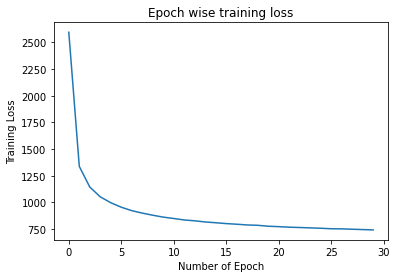

In [ ]:
x_axis = []
y_axis = []

for i in range(len(history.history['loss'])):
  x_axis.append(i)
  y_axis.append(history.history['loss'][i])

plt.plot(x_axis, y_axis)
plt.title('Epoch wise training loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
model = Sequential()

model.add(Dense(512, input_dim=784, activation='relu', trainable=False, use_bias=True)) #trainable=true #use_bias=true

model.add(Dense(128, input_dim=512, activation='relu', trainable=False, use_bias=True))

model.add(Dense(64, input_dim=128, activation='relu', trainable=False, use_bias=True))

model.add(Dense(32, input_dim=64, activation='relu', trainable=True, use_bias=True))

model.add(Dense(10, input_dim=32, activation='softmax', trainable=True, use_bias=True))

adam = tf.keras.optimizers.Adam(learning_rate=0.001) #learning_rate=0.001

model.compile(
  optimizer=adam,
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 478,250
Trainable params: 2,410
Non-trainable params: 475,840
_________________________________________________________________


In [ ]:
history = model.fit(X_train, to_categorical(y_train), batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 7.1989 - accuracy: 0.4457
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 1.3785 - accuracy: 0.6083
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 1.0444 - accuracy: 0.6608
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.9394 - accuracy: 0.6922
Epoch 5/30
600/600 [==============================] - 2s 4ms/step - loss: 0.8847 - accuracy: 0.7113
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.8523 - accuracy: 0.7219
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.8204 - accuracy: 0.7340
Epoch 8/30
600/600 [==============================] - 2s 4ms/step - loss: 0.7922 - accuracy: 0.7426
Epoch 9/30
600/600 [==============================] - 3s 4ms/step - loss: 0.7757 - accuracy: 0.7484
Epoch 10/30
600/600 [==============================] - 3s 4ms/step - loss: 0.7614 - accuracy: 0.7530

In [ ]:
model.save('MNISTClassificationModel.h5')

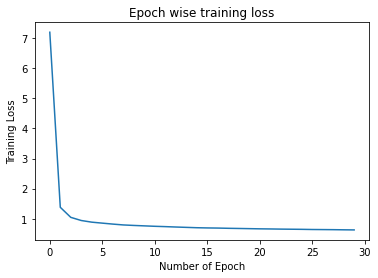

In [ ]:
x_axis = []
y_axis = []

for i in range(len(history.history['loss'])):
  x_axis.append(i)
  y_axis.append(history.history['loss'][i])

plt.plot(x_axis, y_axis)
plt.title('Epoch wise training loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_pred = list(y_pred)
y_test = y_test.reshape(10000,)
y_test = list(y_test)

In [ ]:
print('Accuracy:', accuracy(y_pred, y_test))

Accuracy: 0.8163


In [ ]:
classWiseAccuracy(y_test, y_pred)

Class0 0.9193877551020408
Class1 0.9409691629955947
Class2 0.8081395348837209
Class3 0.7653465346534654
Class4 0.7505091649694501
Class5 0.7769058295964125
Class6 0.8496868475991649
Class7 0.8219844357976653
Class8 0.7782340862422998
Class9 0.7333994053518335


#Question 4

In [ ]:
X_train = images_file_read("/content/drive/MyDrive/SML/mnist/train-images-idx3-ubyte.gz")
print(X_train.shape)
y_train = labels_file_read("/content/drive/MyDrive/SML/mnist/train-labels-idx1-ubyte.gz")
X_test = images_file_read("/content/drive/MyDrive/SML/mnist/t10k-images-idx3-ubyte.gz")
print(X_test.shape)
y_test = labels_file_read("/content/drive/MyDrive/SML/mnist/t10k-labels-idx1-ubyte.gz")

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

In [ ]:
dataset1 = np.zeros((60000,28*28))
y1 = []

dataset2 = np.zeros((60000,28*28))
y2 = []

dataset3 = np.zeros((60000,28*28))
y3 = []

notVal1 = []
notVal2 = []
notVal3 = []

In [ ]:
for i in range(60000):

  index1 = random.randint(0,59999)
  if index1 not in notVal1:
    notVal1.append(index1)

  index2 = random.randint(0,59999)
  if index2 not in notVal2:
    notVal2.append(index2)

  index3 = random.randint(0,59999)
  if index3 not in notVal3:
    notVal3.append(index3)

  dataset1[i] = X_train[index1]
  y1.append(y_train[index1])

  dataset2[i] = X_train[index2]
  y2.append(y_train[index2])

  dataset3[i] = X_train[index3]
  y3.append(y_train[index3])

val1 = np.zeros((60000-len(notVal1),28*28))
y_val1 = []

val2 = np.zeros((60000-len(notVal2),28*28))
y_val2 = []

val3 = np.zeros((60000-len(notVal3),28*28))
y_val3 = []

j1 = 0
j2 = 0
j3 = 0

for i in range(60000):

  if i not in notVal1 and j1<60000-len(notVal1):
    val1[j1] = X_train[i]
    y_val1.append(y_train[i])
    j1 += 1

  if i not in notVal2 and j2<60000-len(notVal2):
    val2[j2] = X_train[i]
    y_val2.append(y_train[i])
    j2 += 1

  if i not in notVal3 and j3<60000-len(notVal3):
    val3[j3] = X_train[i]
    y_val3.append(y_train[i])
    j3 += 1

In [ ]:
print(val1.shape)
print(val2.shape)
print(val3.shape)
print(len(notVal1))
print(len(notVal2))
print(len(notVal3))

(22022, 784)
(22186, 784)
(22172, 784)
37978
37814
37828


3 Decision Trees have to be made.

In [ ]:
clf1 = DecisionTreeClassifier()
clf1 = clf1.fit(dataset1,y1)

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(dataset2,y2)

clf3 = DecisionTreeClassifier()
clf3 = clf3.fit(dataset3,y3)

In [ ]:
with open('Q4_clf1', 'wb') as file:
  pickle.dump(clf1, file)

with open('Q4_clf2', 'wb') as file:
  pickle.dump(clf2, file)

with open('Q4_clf3', 'wb') as file:
  pickle.dump(clf3, file)

In [ ]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

In [ ]:
num = 0
final_pred = [-1]*len(y_test)

for i in range(len(y_test)):

  a = y_pred1[i]
  b = y_pred2[i]
  c = y_pred3[i]

  ans = y_test[i]

  if a==b and b==c:
    if a==ans:
      final_pred[i] = ans
      num += 1
  elif a==b and b!=c:
    if a==ans:
      final_pred[i] = ans
      num += 1
  elif b==c and c!=a:
    if b==ans:
      final_pred[i] = ans
      num += 1
  elif c==a and a!=b:
    if c==ans:
      final_pred[i] = ans
      num += 1
  else:
    if a==ans:
      final_pred[i] = ans
      num += 1

num = num*1.0

In [ ]:
print('Accuracy:', accuracy(final_pred, list(y_test)))

Accuracy: 0.9104


In [ ]:
classWiseAccuracy(list(y_test), final_pred)

Class0 0.9693877551020408
Class1 0.9770925110132158
Class2 0.8953488372093024
Class3 0.8831683168316832
Class4 0.8920570264765784
Class5 0.8766816143497758
Class6 0.9269311064718163
Class7 0.9241245136186771
Class8 0.8531827515400411
Class9 0.8939544103072349
